# Warranty Claims Fraud Prediction


The aim of this project is to analyze the warranty claims based on their region, product, claim value and other features to predict their authenticity. The dataset is taken from [Kaggle](https://www.kaggle.com/code/govindshukla98/warranty-claims-fraud-prediction-using-decision-tr/input). The dataset contains 358 rows and 21 columns.


### Data Dictionary
| Column Name | Description |
| --- | --- |
|Unnamed: 0| Index|
|Region| Region of the claim|
|State| State of the claim|
|Area| Area of the claim|
|City| City of the claim|
|Consumer_profile| Consumer profile Business/Personal|
|Product_category| Product category Household/Entertainment|
|Product_type| Product type AC/TV|
|AC_1001_Issue| 0- No issue / No componenent, 1- repair, 2-replacement|
|AC_1002_Issue| 0- No issue / No componenent, 1- repair, 2-replacement|
|AC_1003_Issue| 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2001_Issue| 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2002_Issue| 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2003_Issue| 0- No issue / No componenent, 1- repair, 2-replacement|
|Claim_Value| Claim value in INR|
|Service_Center| Service center code|
|Product_Age| Product age in days|
|Purchased_from| Purchased from - Dealer, Manufacturer, Internet|
|Call_details| Call duration|
|Purpose| Purpose of the call|
|Fraud| Fraudulent (1) or Genuine (0)|

In [778]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [779]:
df = pd.read_csv('df_Clean.csv')
df.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


## Data Understanding

In [780]:
df.shape

(358, 21)

In [781]:
df['Fraud'].value_counts()

Fraud
0    323
1     35
Name: count, dtype: int64

In [782]:
df.columns

Index(['Unnamed: 0', 'Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Service_Centre', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose', 'Fraud'],
      dtype='object')

In [783]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        358 non-null    int64  
 1   Region            358 non-null    object 
 2   State             358 non-null    object 
 3   Area              358 non-null    object 
 4   City              358 non-null    object 
 5   Consumer_profile  358 non-null    object 
 6   Product_category  358 non-null    object 
 7   Product_type      358 non-null    object 
 8   AC_1001_Issue     358 non-null    int64  
 9   AC_1002_Issue     358 non-null    int64  
 10  AC_1003_Issue     358 non-null    int64  
 11  TV_2001_Issue     358 non-null    int64  
 12  TV_2002_Issue     358 non-null    int64  
 13  TV_2003_Issue     358 non-null    int64  
 14  Claim_Value       358 non-null    float64
 15  Service_Centre    358 non-null    int64  
 16  Product_Age       358 non-null    int64  
 1

In [784]:
df.describe()

,Unnamed: 0,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,370.094972,0.332402,0.329609,0.203911,0.377095,0.452514,0.268156,11994.534916,12.812849,201.843575,11.931844,0.097765
std,1344.035904,0.629446,0.615182,0.529559,0.621943,0.670910,0.508353,12063.213579,1.766844,259.731564,11.559474,0.297413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.500000,0.000000
25%,128.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4006.000000,12.000000,14.000000,1.600000,0.000000
50%,217.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7194.000000,13.000000,60.000000,6.500000,0.000000
75%,306.750000,0.000000,0.750000,0.000000,1.000000,1.000000,0.000000,15000.000000,15.000000,303.750000,23.000000,0.000000
max,11797.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,50000.000000,16.000000,991.000000,30.000000,1.000000


In [785]:
df.isnull().sum()

Unnamed: 0          0
Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [786]:
df.isna().sum()

Unnamed: 0          0
Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [787]:
df.duplicated().sum()

0

In [788]:
df.nunique()

Unnamed: 0          358
Region                8
State                20
Area                  2
City                 27
Consumer_profile      2
Product_category      2
Product_type          2
AC_1001_Issue         3
AC_1002_Issue         3
AC_1003_Issue         3
TV_2001_Issue         3
TV_2002_Issue         3
TV_2003_Issue         3
Claim_Value         107
Service_Centre        7
Product_Age         188
Purchased_from        3
Call_details         37
Purpose               3
Fraud                 2
dtype: int64

# Data Cleaning

In [789]:
# Drop index column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [790]:
# renaming the values in product issue column
df['AC_1001_Issue'] = df['AC_1001_Issue'].map({ 0 : 'No Issue', 1 : 'Repair', 2 : 'Replacement'})
df['AC_1002_Issue'] = df['AC_1002_Issue'].map({ 0 : 'No Issue', 1 : 'Repair', 2 : 'Replacement'})
df['AC_1003_Issue'] = df['AC_1003_Issue'].map({ 0 : 'No Issue', 1 : 'Repair', 2 : 'Replacement'})
df['TV_2001_Issue'] = df['TV_2001_Issue'].map({ 0 : 'No Issue', 1 : 'Repair', 2 : 'Replacement'})
df['TV_2002_Issue'] = df['TV_2002_Issue'].map({ 0 : 'No Issue', 1 : 'Repair', 2 : 'Replacement'})
df['TV_2003_Issue'] = df['TV_2003_Issue'].map({ 0 : 'No Issue', 1 : 'Repair', 2 : 'Replacement'})

In [791]:
df.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,No Issue,No Issue,No Issue,Repair,Replacement,No Issue,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,Repair,Repair,No Issue,No Issue,No Issue,No Issue,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,No Issue,Repair,Replacement,No Issue,No Issue,No Issue,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,No Issue,No Issue,No Issue,Repair,Repair,No Issue,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,No Issue,No Issue,No Issue,No Issue,Repair,Replacement,25000.0,15,6,Dealer,1.3,Claim,0


# Data Exploration

## Fraudulent Claim based on Location

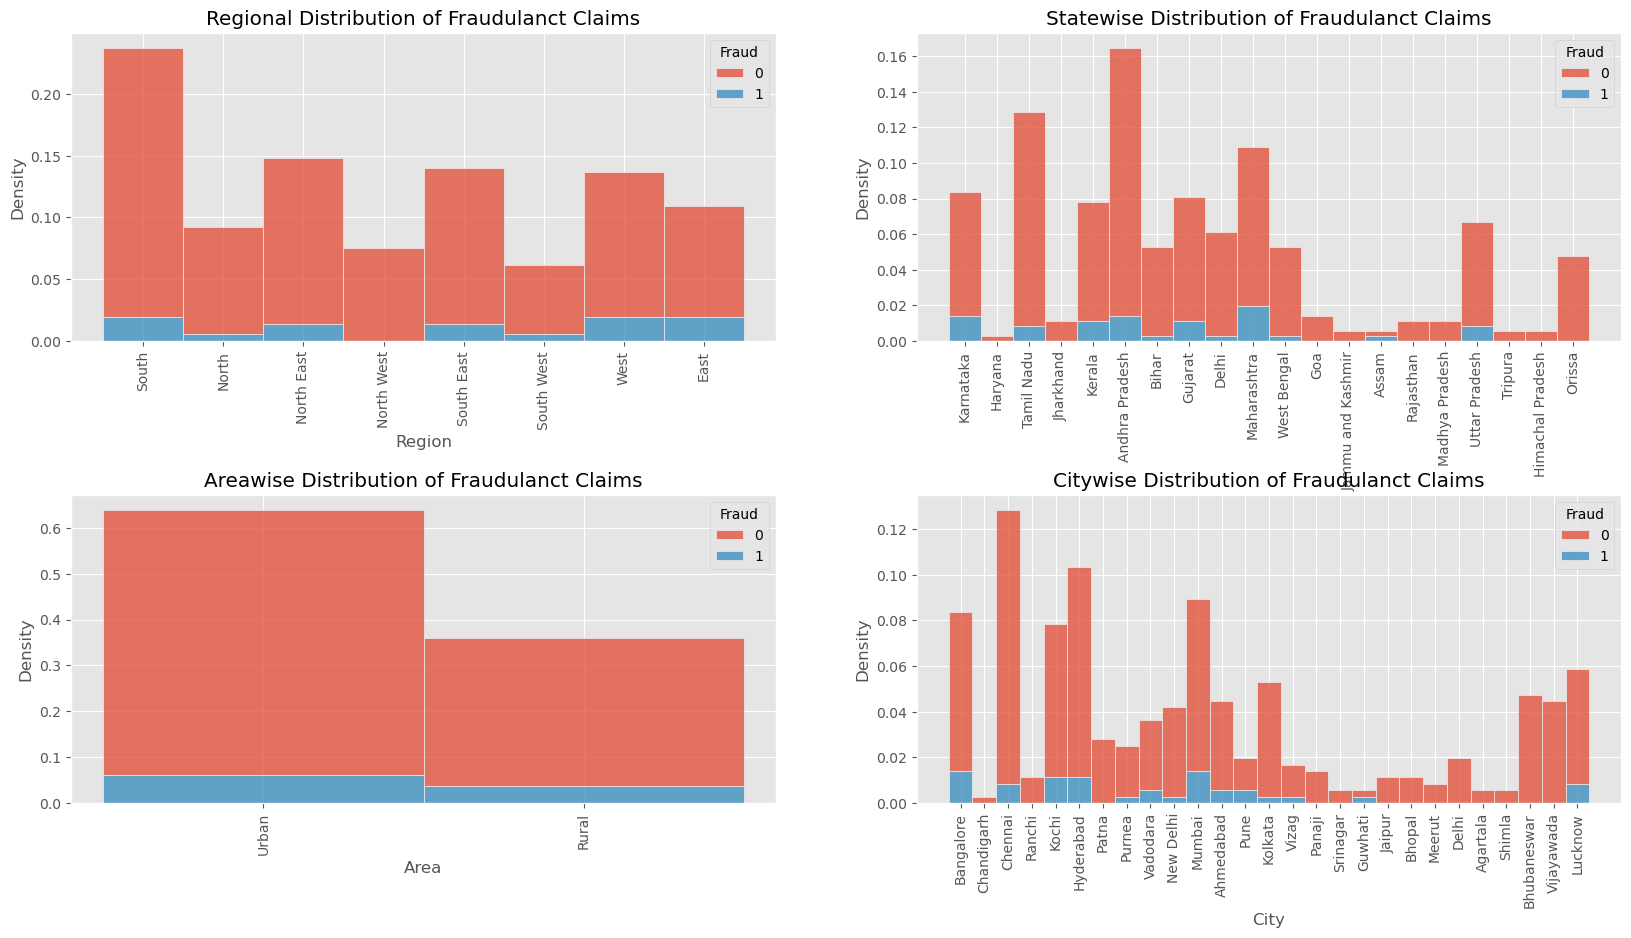

In [792]:
fig, ax = plt.subplots(2,2,figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)

sns.histplot(x='Region', data=df, ax=ax[0,0], hue='Fraud',multiple='stack',element='bars', fill=True,stat='density').set(title='Regional Distribution of Fraudulanct Claims')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.histplot(x='State', data=df, ax=ax[0,1], hue='Fraud',multiple='stack',element='bars', fill=True,stat='density').set(title='Statewise Distribution of Fraudulanct Claims')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.histplot(x='Area', data=df, ax=ax[1,0], hue='Fraud',multiple='stack',element='bars', fill=True,stat='density').set(title='Areawise Distribution of Fraudulanct Claims')
ax[1,0].xaxis.set_tick_params(rotation=90)

sns.histplot(x='City', data=df, ax=ax[1,1], hue='Fraud',multiple='stack',element='bars', fill=True,stat='density').set(title='Citywise Distribution of Fraudulanct Claims')
ax[1,1].xaxis.set_tick_params(rotation=90)

From 1st Plot:
1. Notice that there is no fraud claim in North West.
2. Highest fraudulance claim is in South, North East, South East, West and East Region.

From 2nd Plot:
1. Highest Warranty claims is in Andhra Pradesh, Maharashtra and Tamil Nadu State.
2. Highest fraudulance claim is in Maharashtra.

From 3rd Plot:
1. Highest Warranty claims is in Urban area.

From 4th Plot:
1. Highest Warranty claims is in Chennai, Hyderabad, Mumbai, Bangalore, Kochi city.
2. Highest Fraudulance claims is in Hyderabad, Mumbai, Bangalore, Kochi city


## Fraudulent Claim based on Consumer

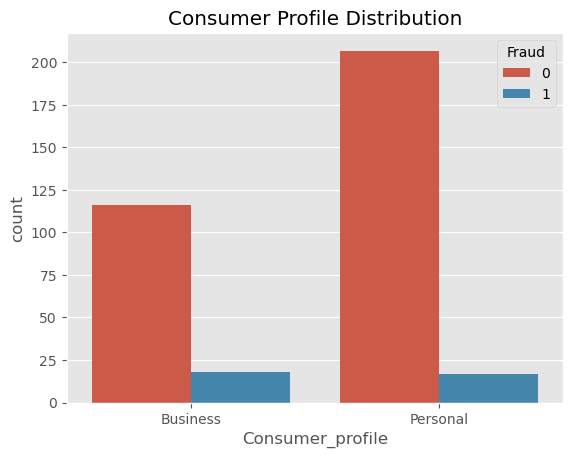

In [793]:
sns.countplot(x='Consumer_profile', data=df, hue='Fraud').set(title='Consumer Profile Distribution')
plt.show()

## Fraudulent Claim based on Product

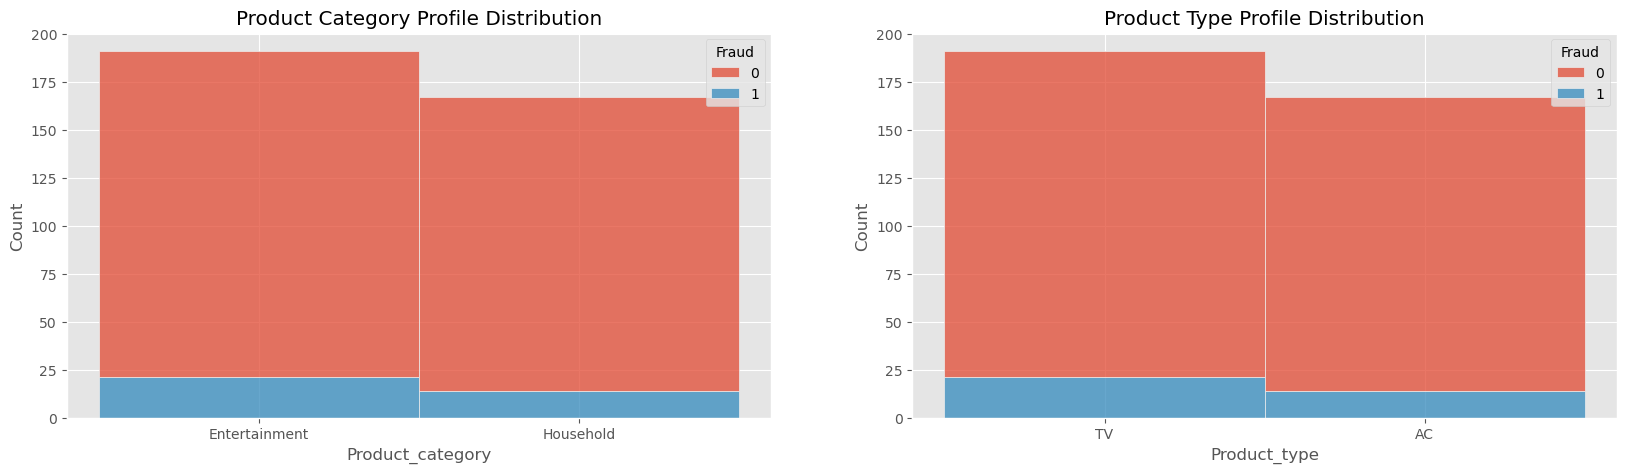

In [794]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
# fig.subplots_adjust(hspace=0.5)

sns.histplot(x='Product_category', data=df, hue='Fraud', multiple='stack', ax=ax[0]).set(title='Product Category Profile Distribution')
sns.histplot(x='Product_type', data=df, hue='Fraud', multiple='stack', ax=ax[1]).set(title='Product Type Profile Distribution')
plt.show()

## Fraudulent Claim based on Product Part

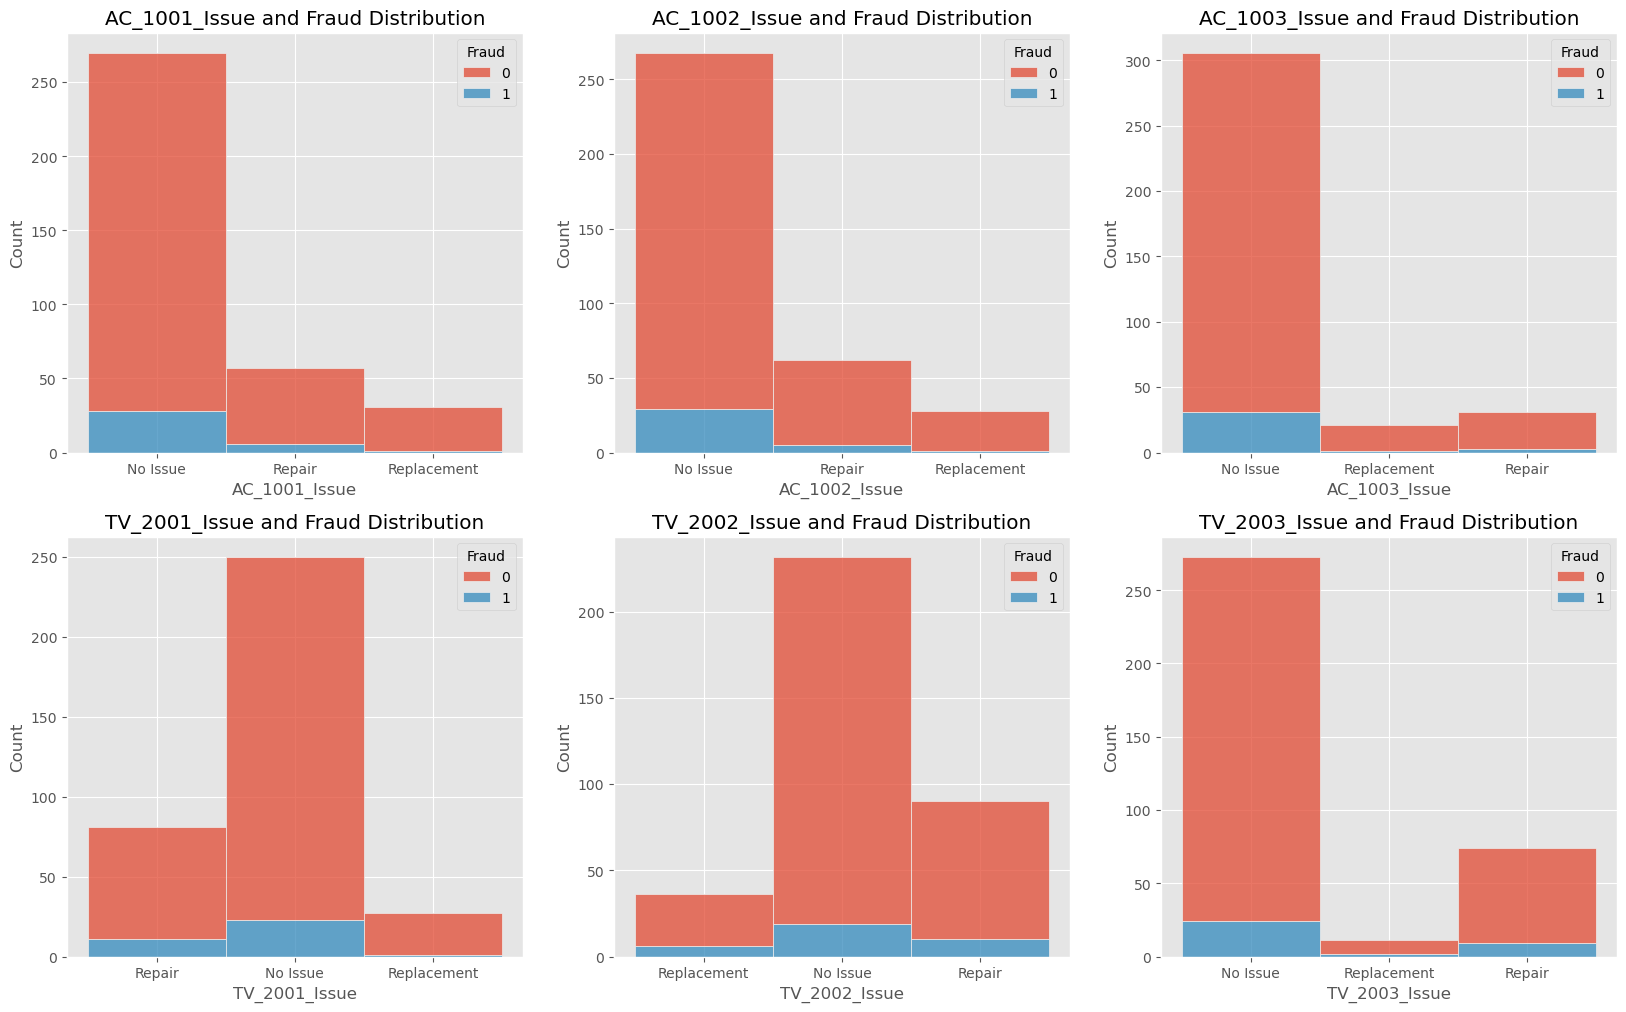

In [795]:
fig, ax = plt.subplots(2,3,figsize=(20,12))

sns.histplot(x = 'AC_1001_Issue', data = df, ax =ax[0,0], hue = 'Fraud', multiple='stack').set(title='AC_1001_Issue and Fraud Distribution')
sns.histplot(x = 'AC_1002_Issue', data = df, ax =ax[0,1], hue = 'Fraud', multiple='stack').set(title='AC_1002_Issue and Fraud Distribution')
sns.histplot(x = 'AC_1003_Issue', data = df, ax =ax[0,2], hue = 'Fraud', multiple='stack').set(title='AC_1003_Issue and Fraud Distribution')
sns.histplot(x = 'TV_2001_Issue', data = df, ax =ax[1,0], hue = 'Fraud', multiple='stack').set(title='TV_2001_Issue and Fraud Distribution')
sns.histplot(x = 'TV_2002_Issue', data = df, ax =ax[1,1], hue = 'Fraud', multiple='stack').set(title='TV_2002_Issue and Fraud Distribution')
sns.histplot(x = 'TV_2003_Issue', data = df, ax =ax[1,2], hue = 'Fraud', multiple='stack').set(title='TV_2003_Issue and Fraud Distribution')

plt.show()

# Service Center and Fraudulent Claims

In [796]:
df

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,No Issue,No Issue,No Issue,Repair,Replacement,No Issue,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,Repair,Repair,No Issue,No Issue,No Issue,No Issue,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,No Issue,Repair,Replacement,No Issue,No Issue,No Issue,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,No Issue,No Issue,No Issue,Repair,Repair,No Issue,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,No Issue,No Issue,No Issue,No Issue,Repair,Replacement,25000.0,15,6,Dealer,1.3,Claim,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,East,Tamil Nadu,Rural,Chennai,Personal,Entertainment,TV,No Issue,No Issue,No Issue,No Issue,No Issue,No Issue,0.0,13,3,Manufacturer,0.5,Complaint,0
354,North East,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,No Issue,No Issue,No Issue,Repair,Repair,Repair,0.0,15,12,Manufacturer,1.6,Complaint,0
355,South,Tamil Nadu,Urban,Chennai,Personal,Entertainment,TV,No Issue,No Issue,No Issue,Replacement,No Issue,No Issue,0.0,15,254,Dealer,9.0,Claim,0
356,East,Uttar Pradesh,Urban,Lucknow,Personal,Household,AC,Repair,Repair,Repair,No Issue,No Issue,No Issue,50000.0,13,12,Manufacturer,1.5,Claim,1


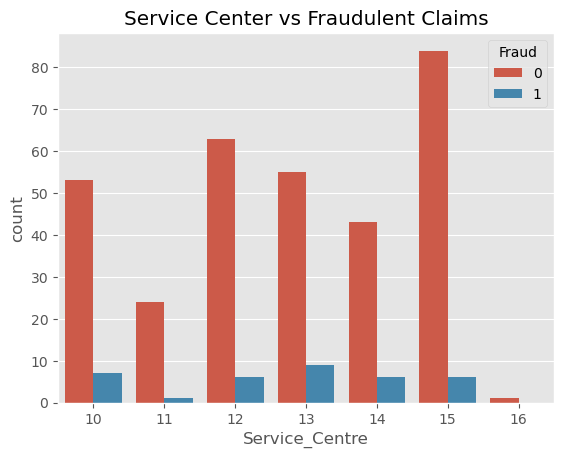

In [797]:
sns.countplot(x='Service_Centre', data=df, hue='Fraud').set(title='Service Center vs Fraudulent Claims')
plt.show()

# Claim Value vs Fraudulent Claims

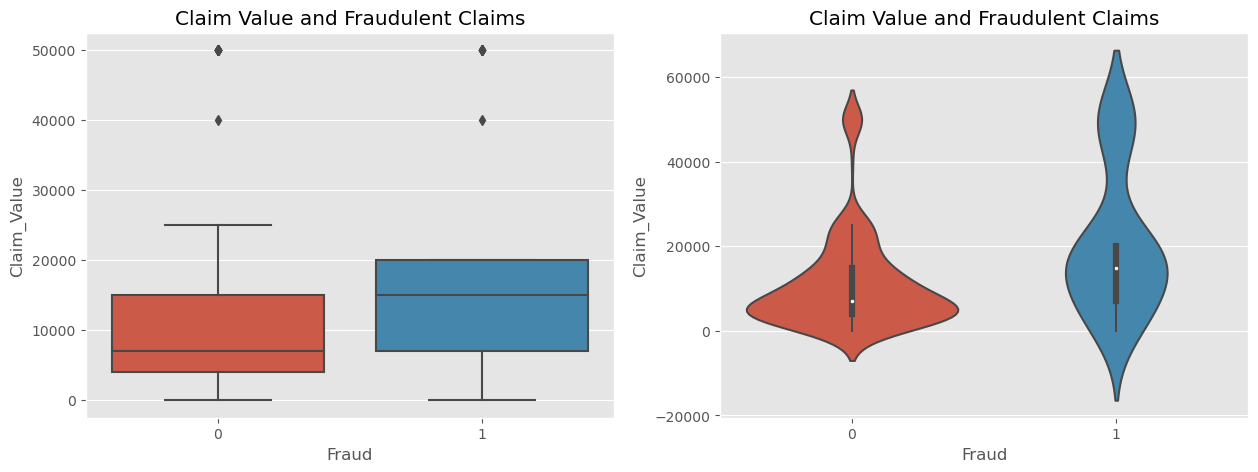

In [798]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(x = 'Fraud', y = 'Claim_Value', data = df, ax =ax[0]).set_title('Claim Value and Fraudulent Claims')
sns.violinplot(x = 'Fraud', y = 'Claim_Value', data = df, ax =ax[1]).set_title('Claim Value and Fraudulent Claims')
plt.show()

# Product Age vs Fradulent Claims

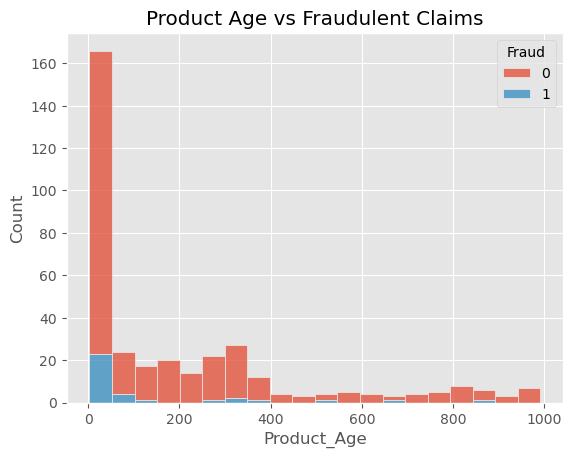

In [799]:
sns.histplot(x='Product_Age', data = df, hue='Fraud', multiple='stack', bins=20).set(title='Product Age vs Fraudulent Claims')
plt.show()

Product at age below 50days has the highest warranty claims and fraudulent claims.

# Purchase Point vs Fraudulent Cases

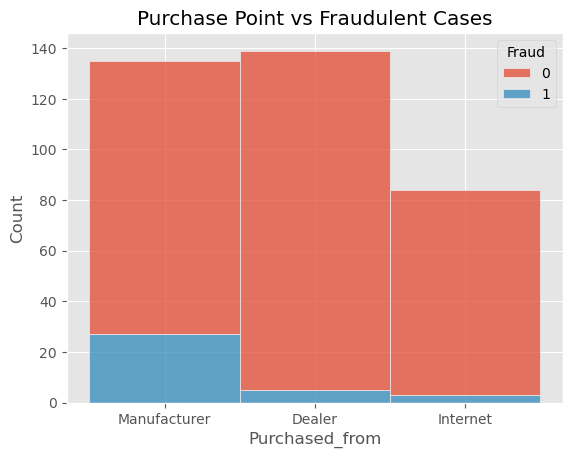

In [800]:
sns.histplot(x='Purchased_from', data=df, hue='Fraud', multiple='stack').set(title='Purchase Point vs Fraudulent Cases')
plt.show()

# Call Details vs Fraudulent Claims

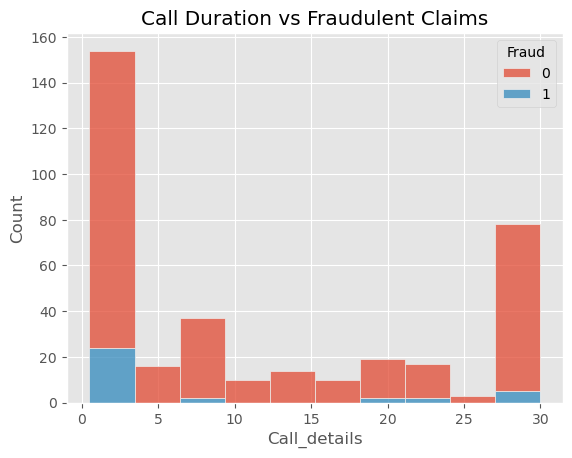

In [801]:
sns.histplot(x='Call_details', data=df, hue='Fraud', multiple='stack').set(title='Call Duration vs Fraudulent Claims')
plt.show()

The histogram shows that the fraudulent claims are more frequent when the customer care call duration is less than 3-4 minutes. However, the genuine claims are more frequent when the customer care call duration is more than 4 minutes.

# Purpose of Contact vs Fraudulent Claims

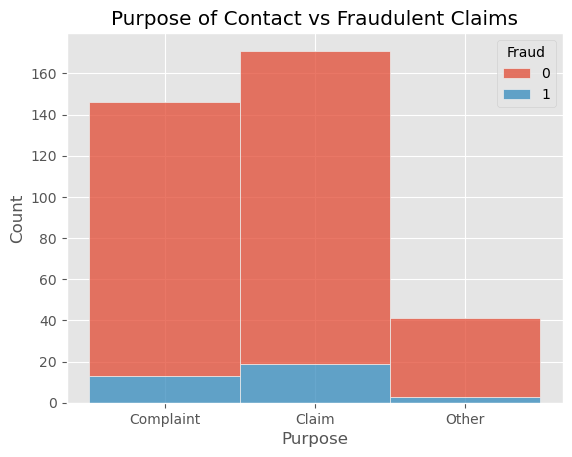

In [802]:
sns.histplot(x='Purpose', data=df, hue='Fraud', multiple='stack').set(title='Purpose of Contact vs Fraudulent Claims')
plt.show()

Majority warranty claims for the purpose of claim.

# Data Preprocessing

## 1. Remove Outliers
removing outlier from claims values column using IQR method. Can also use z-score method

### IQR Method

In [803]:
df.shape

(358, 20)

In [804]:
Q1 = df['Claim_Value'].quantile(0.25)
Q3 = df['Claim_Value'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df['Claim_Value'] >= lower_bound) & (df['Claim_Value'] <= upper_bound)]

## Z-Score Method (OPTIONAL)

In [805]:
# from scipy import stats

# z_scores = np.abs(stats.zscore(df['Claim_Value']))
# threshold = 3  # You can adjust this threshold based on your data

# # Filter the DataFrame to remove outliers
# df = df[z_scores < threshold]

In [806]:
df.shape

(334, 20)

### 2. Label Encoding for "Object" Datatypes

In [807]:
from sklearn.preprocessing import LabelEncoder

#Label encoding Object
le = LabelEncoder()

# columns for label encoding
cols = df.select_dtypes(include=['object']).columns

# label encoding
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

Region [4 1 2 3 5 6 7 0]
State [10  6 16  9 11  0  2  5  3 13 19  4  8  1 15 12 18 17  7 14]
Area [1 0]
City [ 2  5  6 21 11  9 18 20 24 16 15  1 19 12 26 17 23  8 10  3 14  7  0 22
  4 25 13]
Consumer_profile [0 1]
Product_category [0 1]
Product_type [1 0]
AC_1001_Issue [0 1 2]
AC_1002_Issue [0 1 2]
AC_1003_Issue [0 2 1]
TV_2001_Issue [1 0 2]
TV_2002_Issue [2 0 1]
TV_2003_Issue [0 2 1]
Purchased_from [2 0 1]
Purpose [1 0 2]


/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_20868/2325159971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])
/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_20868/2325159971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])
/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_20868/2325159971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [808]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 357
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            334 non-null    int64  
 1   State             334 non-null    int64  
 2   Area              334 non-null    int64  
 3   City              334 non-null    int64  
 4   Consumer_profile  334 non-null    int64  
 5   Product_category  334 non-null    int64  
 6   Product_type      334 non-null    int64  
 7   AC_1001_Issue     334 non-null    int64  
 8   AC_1002_Issue     334 non-null    int64  
 9   AC_1003_Issue     334 non-null    int64  
 10  TV_2001_Issue     334 non-null    int64  
 11  TV_2002_Issue     334 non-null    int64  
 12  TV_2003_Issue     334 non-null    int64  
 13  Claim_Value       334 non-null    float64
 14  Service_Centre    334 non-null    int64  
 15  Product_Age       334 non-null    int64  
 16  Purchased_from    334 non-null    int64  
 17  Ca

# Data Correlation

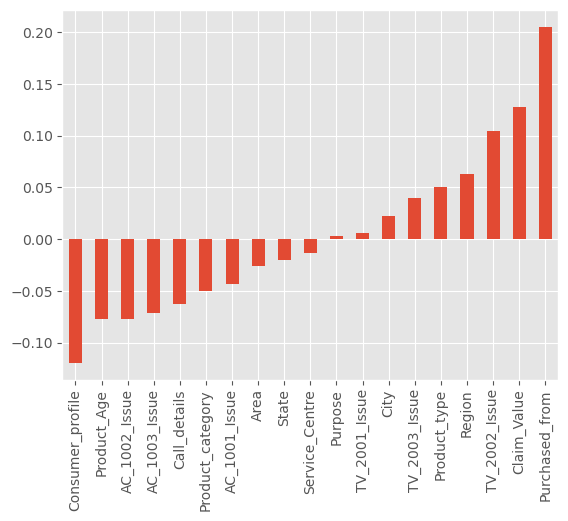

In [809]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')
plt.show()

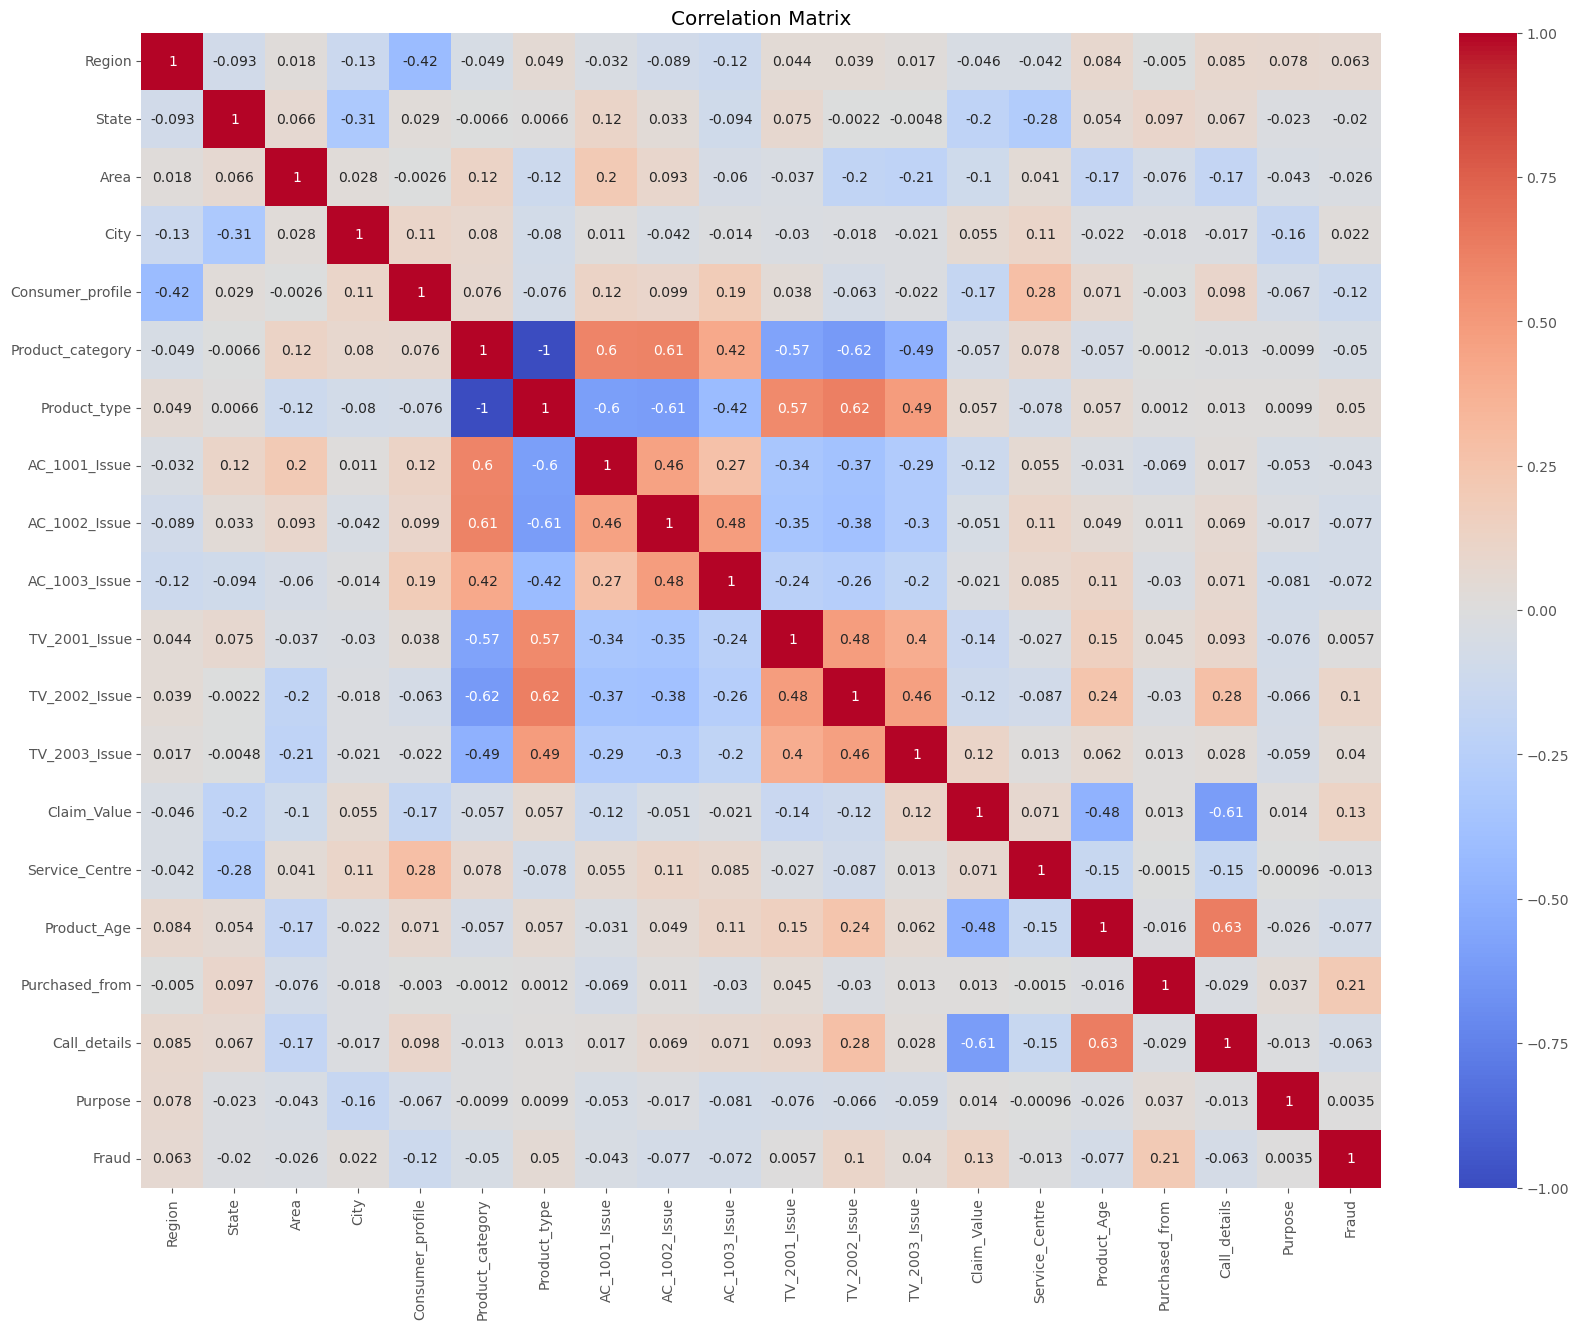

In [810]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Train/Test Split

In [811]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, log_loss, f1_score, mean_squared_error, precision_score, recall_score
X_train, X_test, y_train, y_test = train_test_split(df.drop('Fraud',axis=1), df['Fraud'], test_size=0.3, random_state=42)

## Model Building

* Decison Tree Classifier
* Random Forest Classifier
* Logistic Regression

## Decision Tree Classifier

In [812]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

Using GridSearchCV to find the best parameters for the model.

In [813]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# #creating Decision Tree Classifer object
# dtree = DecisionTreeClassifier()

# #defining parameter range
# param_grid = {
#     'max_depth': [2,4,6,8,10],
#     'min_samples_leaf': [2,4,6,8,10],
#     'min_samples_split': [2,4,6,8,10],
#     'criterion': ['gini', 'entropy'],
#     'random_state': [0,42]
#     }

# #Creating grid search object
# grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 1)

# #Fitting the grid search object to the training data
# grid_dtree.fit(X_train, y_train)

# #Printing the best parameters
# print('Best parameters found: ', grid_dtree.best_params_)

In [814]:
#Best estimator for Decision Tree Classifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the Decision Tree Classifier to the training data
dtree.fit(X_train,y_train)

#training accuracy
print(dtree.score(X_train,y_train))

#prediction on test data
d_pred = dtree.predict(X_test)

#test accuracy
print(accuracy_score(y_test, d_pred))

0.9313304721030042
0.9108910891089109


## Random Forest Classifier

In [815]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [816]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# rfc = RandomForestClassifier(class_weight='balanced')
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 5, 10],
#     'max_features': ['sqrt', 'log2', None],
#     'random_state': [0, 42]
# }

# # Perform a grid search with cross-validation to find the best hyperparameters
# grid_search = GridSearchCV(rfc, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print('Best parameters found: ', grid_search.best_params_)

In [817]:
rfc = RandomForestClassifier(random_state=42, max_depth=None, max_features='sqrt', n_estimators=100, class_weight='balanced')

#Fitting the Decision Tree Classifier to the training data
rfc.fit(X_train,y_train)

#training accuracy
print(rfc.score(X_train,y_train))

#prediction on test data
rfc_pred = rfc.predict(X_test)

#test accuracy
print(accuracy_score(y_test, rfc_pred))

0.9699570815450643
0.9108910891089109


## Logistic Regression

In [818]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr

LogisticRegression()

In [819]:
#Fitting the Logistic Regression to the training data
lr.fit(X_train,y_train)

#training accuracy
print(lr.score(X_train,y_train))

#prediction on test data
l_pred = lr.predict(X_test)

#test accuracy
print(accuracy_score(y_test, l_pred))

0.9184549356223176
0.9207920792079208


/Users/ofotech_fitri/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## XGboost

In [820]:
import xgboost as xgb
from xgboost import XGBClassifier

In [821]:
# xgb = XGBClassifier()
# xgb

In [822]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, accuracy_score

# xgb = XGBClassifier()
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'objective': ['binary:logistic'],
#     'eval_metric': ['logloss'],
# }

# # Perform a grid search with cross-validation to find the best hyperparameters
# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     scoring=make_scorer(accuracy_score),
#     cv=5,  # Number of cross-validation folds
#     verbose=2,  # Increase verbosity to see progress
# )

# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print('Best parameters found: ', grid_search.best_params_)

In [823]:
#Best parameters found:  {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.8}

xgb = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric = 'logloss',
    random_state=42
)

In [824]:
#Fitting the Xgboost to the training data
xgb.fit(X_train, y_train)

#training accuracy
print(xgb.score(X_train,y_train))

#prediction on test data
xgb_pred = xgb.predict(X_test)

#test accuracy
print(accuracy_score(y_test, xgb_pred))

0.9399141630901288
0.900990099009901


# Model Evaluation

In [825]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, mean_absolute_error, log_loss, f1_score, mean_squared_error, precision_score, recall_score, r2_score

## Confusion Matrix

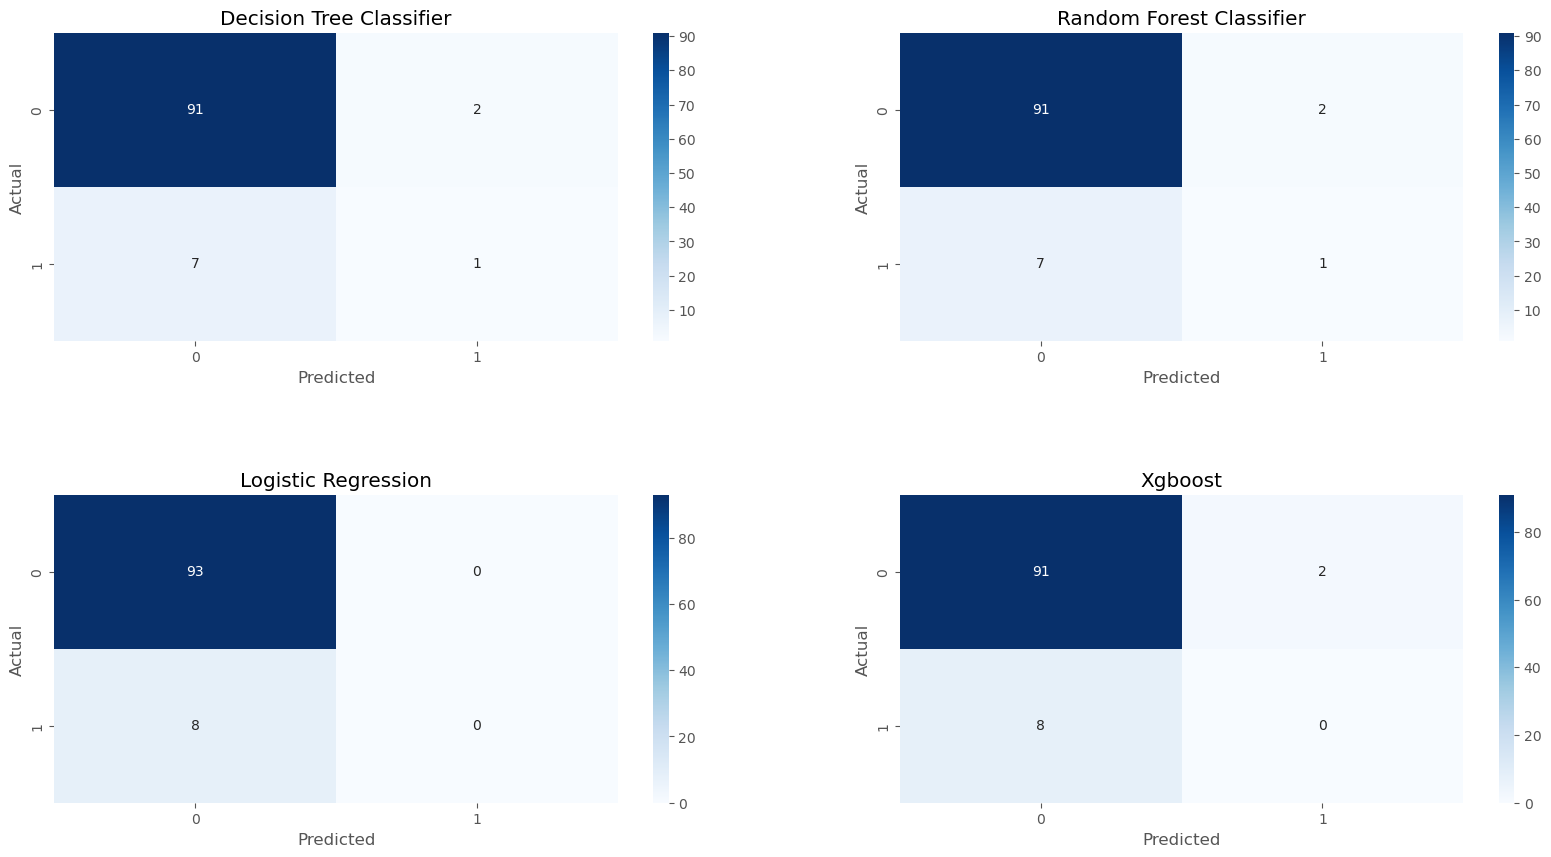

In [826]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='Blues', fmt='g', ax=ax[0,0]).set(title='Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues', fmt='g', ax=ax[0,1]).set(title='Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, l_pred), annot=True, cmap='Blues', fmt='g', ax=ax[1,0]).set(title='Logistic Regression')
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, cmap='Blues', fmt='g', ax=ax[1,1]).set(title='Xgboost')

# Set X-axis and Y-axis labels
ax[0, 0].set_xlabel('Predicted')
ax[0, 0].set_ylabel('Actual')

ax[0, 1].set_xlabel('Predicted')
ax[0, 1].set_ylabel('Actual')

ax[1, 0].set_xlabel('Predicted')
ax[1, 0].set_ylabel('Actual')

ax[1, 1].set_xlabel('Predicted')
ax[1, 1].set_ylabel('Actual')

plt.show()

In [827]:
#classification report for Decision Tree Classifier
print(classification_report(y_test,d_pred))

#classification report for Random Forest Classifier
print(classification_report(y_test,rfc_pred))

#classification report for Logistic Regression
print(classification_report(y_test,l_pred))

#classification report for Xgboost Regression
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        93
           1       0.33      0.12      0.18         8

    accuracy                           0.91       101
   macro avg       0.63      0.55      0.57       101
weighted avg       0.88      0.91      0.89       101

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        93
           1       0.33      0.12      0.18         8

    accuracy                           0.91       101
   macro avg       0.63      0.55      0.57       101
weighted avg       0.88      0.91      0.89       101

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        93
           1       0.00      0.00      0.00         8

    accuracy                           0.92       101
   macro avg       0.46      0.50      0.48       101
weighted avg       0.85      0.92      0.88       101

              preci

/Users/ofotech_fitri/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ofotech_fitri/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ofotech_fitri/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [828]:
print('==================== Decision Tree Classifier ====================')
print('Accuracy Score: ', accuracy_score(y_test,d_pred))
print('Recall Score: ', recall_score(y_test,d_pred))
print('Precision Score: ', precision_score(y_test,d_pred))
print('f1 Score: ', f1_score(y_test,d_pred))
print('R2 Score: ', r2_score(y_test,d_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,d_pred))

print('==================== Random Forest Classifier ====================')
print('Accuracy Score: ', accuracy_score(y_test,rfc_pred))
print('Recall Score: ', recall_score(y_test,rfc_pred))
print('Precision Score: ', precision_score(y_test,rfc_pred))
print('f1 Score: ', f1_score(y_test,rfc_pred))
print('R2 Score: ', r2_score(y_test,rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,rfc_pred))

print('==================== Logistic Regression =========================')
print('Accuracy Score: ', accuracy_score(y_test,l_pred))
print('Recall Score: ', recall_score(y_test,l_pred))
print('Precision Score: ', precision_score(y_test,l_pred))
print('f1 Score: ', f1_score(y_test,l_pred))
print('R2 Score: ', r2_score(y_test,l_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,l_pred))

print('==================== Xgboost =========================')
print('Accuracy Score: ', accuracy_score(y_test,xgb_pred))
print('Recall Score: ', recall_score(y_test,xgb_pred))
print('Precision Score: ', precision_score(y_test,xgb_pred))
print('f1 Score: ', f1_score(y_test,xgb_pred))
print('R2 Score: ', r2_score(y_test,xgb_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,xgb_pred))

==================== Decision Tree Classifier ====================
Accuracy Score:  0.9108910891089109
Recall Score:  0.125
Precision Score:  0.3333333333333333
f1 Score:  0.18181818181818182
R2 Score:  -0.2217741935483868
Mean Squared Error:  0.0891089108910891
==================== Random Forest Classifier ====================
Accuracy Score:  0.9108910891089109
Recall Score:  0.125
Precision Score:  0.3333333333333333
f1 Score:  0.18181818181818182
R2 Score:  -0.2217741935483868
Mean Squared Error:  0.0891089108910891
==================== Logistic Regression =========================
Accuracy Score:  0.9207920792079208
Recall Score:  0.0
Precision Score:  0.0
f1 Score:  0.0
R2 Score:  -0.08602150537634379
Mean Squared Error:  0.07920792079207921
==================== Xgboost =========================
Accuracy Score:  0.900990099009901
Recall Score:  0.0
Precision Score:  0.0
f1 Score:  0.0
R2 Score:  -0.3575268817204298
Mean Squared Error:  0.09900990099009901


/Users/ofotech_fitri/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Feature Importance

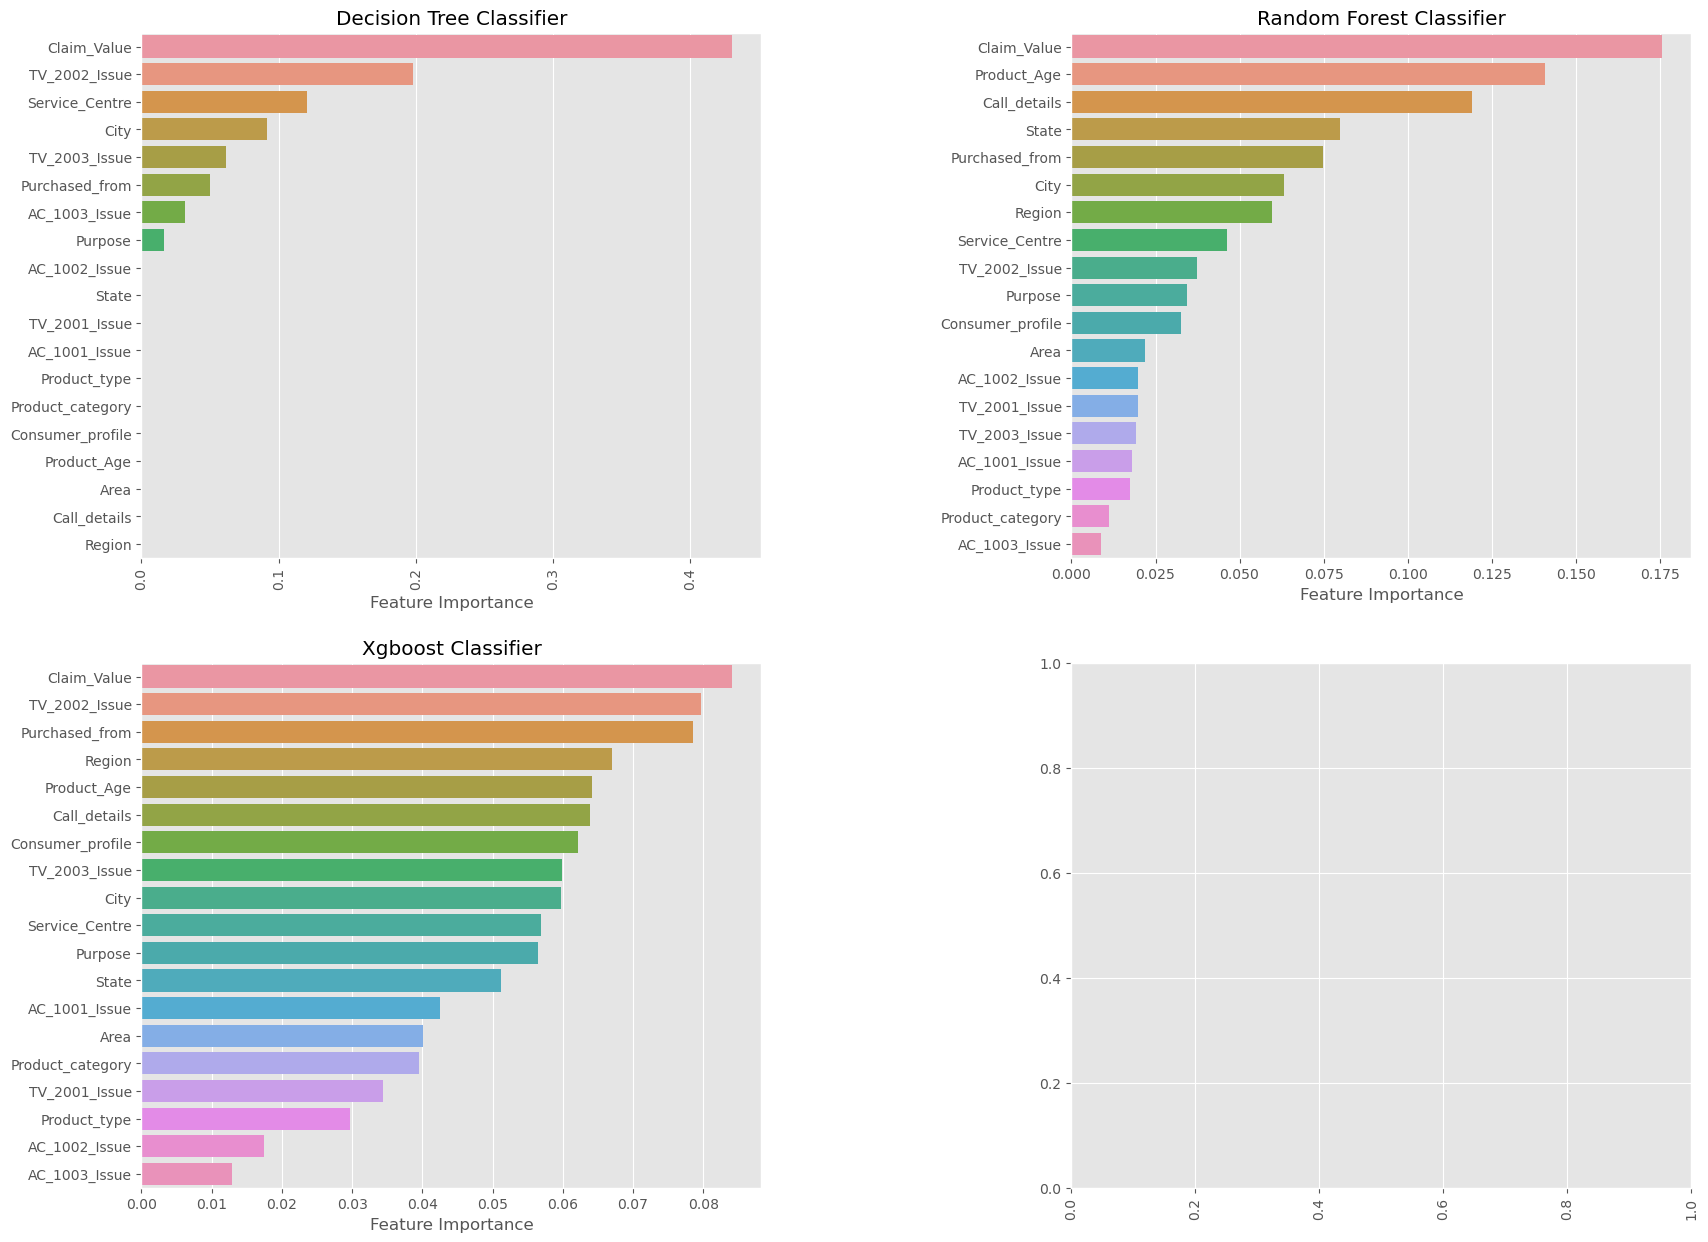

In [829]:
#feature importance for Decision Tree Classifier
feature_importance_d = pd.DataFrame(dtree.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

#feature importance for Random Forest Classifier
feature_importance_rfc = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

#feature importance for Xgboost Classifier
feature_importance_xgb = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

fig, ax = plt.subplots(2,2,figsize=(20,15))
#space between subplots
fig.subplots_adjust(wspace=0.5)
sns.barplot(y=feature_importance_d.index, x=feature_importance_d['Feature Importance'], ax=ax[0,0]).set_title('Decision Tree Classifier')
ax[0,0].xaxis.set_tick_params(rotation=90)
sns.barplot(y=feature_importance_rfc.index, x=feature_importance_rfc['Feature Importance'], ax=ax[0,1]).set_title('Random Forest Classifier')
ax[1,1].xaxis.set_tick_params(rotation=90)
sns.barplot(y=feature_importance_xgb.index, x=feature_importance_xgb['Feature Importance'], ax=ax[1,0]).set_title('Xgboost Classifier')
ax[1,1].xaxis.set_tick_params(rotation=90)

## Conclusion

From the exploratory data analysis, I have concluded that most of the warranty claims takes place in the southern region of India particularly in Andhra Pradesh and Tamil Nadu. Moreover, the fraudulent claims are more frequent in the cities like Hyderabad and Chennai whih are urban regions. The dataset includes the claims regarding two products i.e. TV and AC. The TVs had the higher warranty claims when they where purchased for personal purposes as compared to AC.

Moreover, in the case of Ac the fraudulent claims were made, when there was no issue in the AC parts. However, in the case of TV the fraudulent claims were made, when there was issue in the TV parts as well as when there was no issue in the TV parts. The fraudulent claims were more frequent when the purchase was made through the manufacturer. 

The fraudulent claims tend to have higher claim value as compared to the genuine ones, and the service centre 13 had the highest number of fraudulent claims despite of having lesser number of total warranty claims. It was also observed that the fraudulent claims were more frequent when the customer care call duration was less than 3-4 minutes. 


Coming to the machine learning models, I have used Decision Tree Classifier, Random Forest Classifier, Logistic Regression and Xgboost Classifier. All these models gave excellent accuracy of 90-92%. However, due to lesser number of fraudulent claims or small dataset size (323 Not Fraud, 35 Fraud), the models have poor recall score for fraudulent claims. But this issue can be resolved by collecting more data.